Hey babe, let's try to complete this work together. :) 

I honestly wanted to be a lot active in this project but sadly my exams are just killing me :(

In [ ]:
# predict profit on each product of the 3 companies

# predict which products are going to make loss for the next year


In [ ]:
# no of products with loss = 20016

# no of products with profit = 86448

# no of products with no profit and no loss = 736


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# sorry babe in my directory name, everything is same except it is "Colab Notebooks" (no underscore), so we need to change to run 

dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projects/D2C/train.csv", parse_dates=['delivery date', 'placement date'])
testset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/D2C/test.csv", parse_dates=['delivery date', 'placement date'])
pd.set_option('display.max_columns', None)
#babe you can use you own loading process to load the dataset.
#we can also not parse the dates and treat them as normal columns
dataset.head(6)

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
5,6,Westland,0.1,247.716,4,Central,kariox,Consumer,battery,Standard Class,6330,93.5816,2018-01-01,48185,Michigan,2018-01-01


In [4]:
dataset.info() # info about dataset, contains only 1 null values at delivery type :)
dataset['delivery type']=dataset['delivery type'].fillna(value=dataset['delivery type'].mode()[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               6700 non-null   int64         
 1   departure city   6700 non-null   object        
 2   discount         6700 non-null   float64       
 3   price            6700 non-null   float64       
 4   no of items      6700 non-null   int64         
 5   location         6700 non-null   object        
 6   class            6700 non-null   object        
 7   segment          6700 non-null   object        
 8   sub-class        6700 non-null   object        
 9   delivery type    6699 non-null   object        
 10  RID              6700 non-null   int64         
 11  profit           6700 non-null   float64       
 12  delivery date    6700 non-null   datetime64[ns]
 13  address code     6700 non-null   int64         
 14  departure state  6700 non-null   object 

In [ ]:
testset.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               3294 non-null   int64         
 1   departure city   3294 non-null   object        
 2   discount         3294 non-null   float64       
 3   price            3294 non-null   float64       
 4   no of items      3294 non-null   int64         
 5   location         3294 non-null   object        
 6   class            3294 non-null   object        
 7   segment          3294 non-null   object        
 8   sub-class        3294 non-null   object        
 9   delivery type    3294 non-null   object        
 10  RID              3294 non-null   int64         
 11  delivery date    3294 non-null   datetime64[ns]
 12  address code     3294 non-null   int64         
 13  departure state  3294 non-null   object        
 14  placement date   3294 non-null   datetim

In [5]:
Y=dataset['profit']
# dataset without profit col is given a separate name
X=dataset.drop(['profit', 'address code', 'RID', 'id'], axis=1)
csv_file_ids=testset['id']
X_test=testset.drop(['address code', 'RID', 'id'], axis=1)
print(X_test.shape, X.shape)

(3294, 12) (6700, 12)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=45) #do not change the random state.

x_train, x_test=x_train.reset_index(drop=True), x_test.reset_index(drop=True)
print("train shape, test shape=", x_train.shape, x_test.shape)

train shape, test shape= (5360, 12) (1340, 12)


In [ ]:
print(X.nunique(),"\n\n", X_test.nunique())

departure city      469
discount             12
price              4437
no of items          14
location              4
class                 3
segment               3
sub-class            17
delivery type         4
delivery date        37
departure state      47
placement date       37
dtype: int64 

 departure city      350
discount             12
price              2543
no of items          14
location              4
class                 3
segment               3
sub-class            17
delivery type         4
delivery date        13
departure state      47
placement date       12
dtype: int64


# Visualization

In [ ]:
# these are some sample eda that we can perform and may also help us :))

# no of items delivered on each date (line graph)
# profit on each date (line graph)
# loss on each date (line graph)
# no of items delivered on monthly basis (line graph)
# profit on monthly basis (line graph)
# loss on monthly basis (line graph)

# subclass(the element) delivered monthly (bar chart)
# class (which company) delivered monthly (bar chart)

#monthly profit by each class (line graph)
#monthly loss by each class (line graph)

#count of subclass for each class (bar chart for each class)

#variation of profits based on product prices (box plots or line graphs)
# variation of profits based on product discounts (box plots)

#variation of profits with delivery dates

There are 17 items


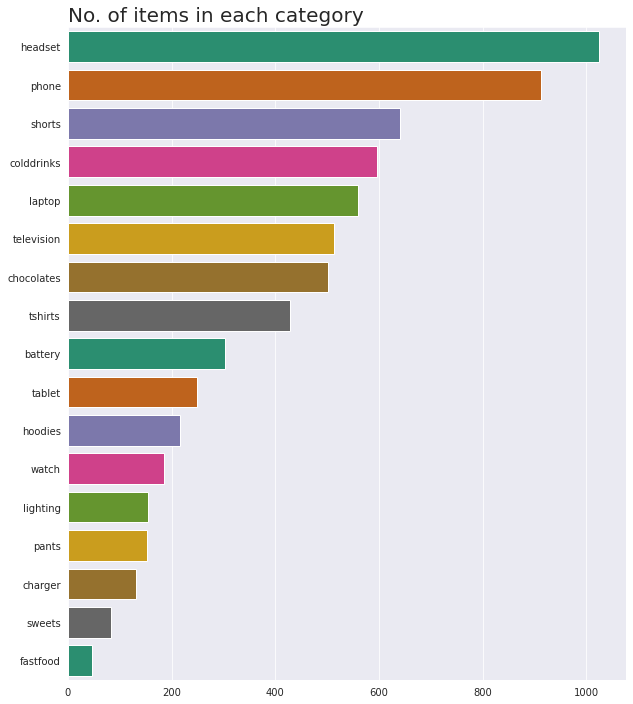

In [ ]:
#No. of items in each category
count_df = pd.DataFrame(dataset['sub-class'].value_counts()).reset_index()
print('There are', len(count_df), 'items')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='sub-class', palette='Dark2')
plt.title('No. of items in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
count_df

,index,sub-class
0,headset,1025
1,phone,913
2,shorts,641
3,colddrinks,597
4,laptop,559
5,television,513
6,chocolates,502
7,tshirts,428
8,battery,303
9,tablet,250


mean profit VS delivery date (*whole dataset*)

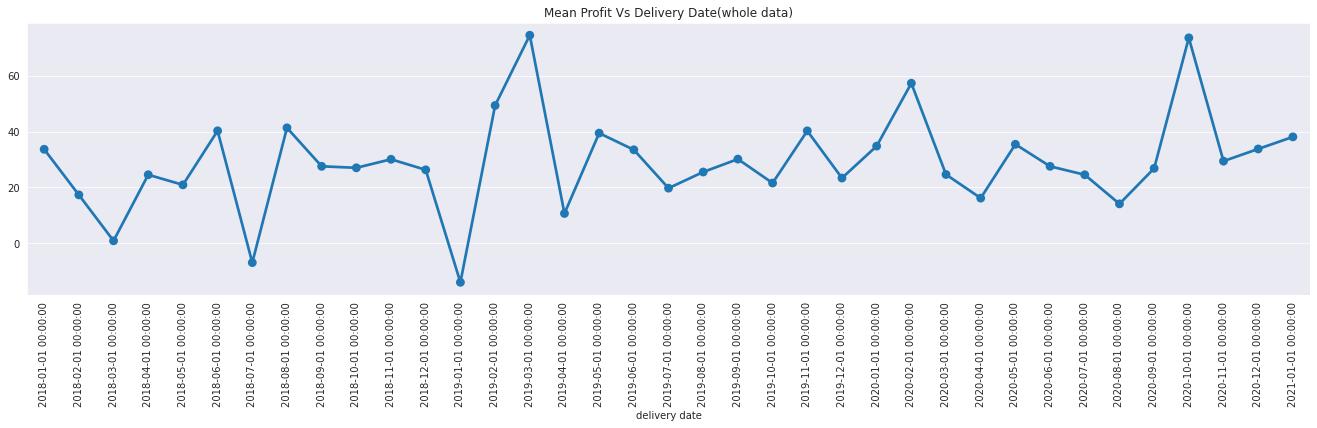

In [ ]:
# mean profit vs delivery date

plt.figure(figsize=(23,5))
delivery_date_profit_mean=dataset.groupby('delivery date')['profit'].mean()
sns.pointplot(x=delivery_date_profit_mean.index,y=delivery_date_profit_mean.values)
plt.title('Mean Profit Vs Delivery Date(whole data)')
plt.xticks(rotation = 90)
plt.show()
#no periodic trend found, not a time series

mean profit VS placement date (*whole dataset*)

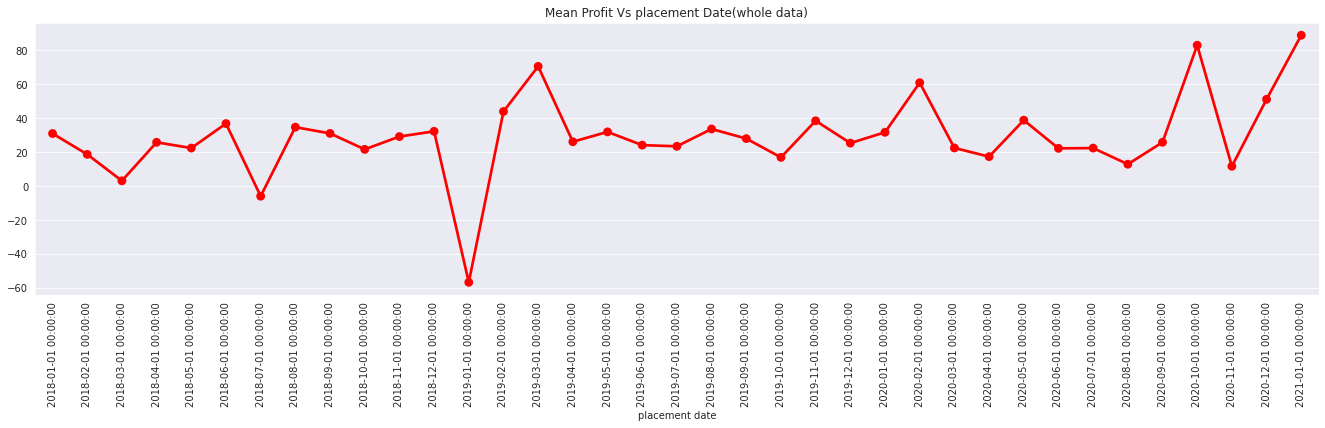

In [ ]:
plt.figure(figsize=(23,5))
placement_date_profit_mean=dataset.groupby('placement date')['profit'].mean()
sns.pointplot(x=placement_date_profit_mean.index,y=placement_date_profit_mean.values, color="red")
plt.title('Mean Profit Vs placement Date(whole data)')
plt.xticks(rotation = 90)
plt.show()
#no periodic trend found, not a time series. Not found in whole dataset, so conclusion stands can not be present in trainset

In [ ]:
# mean of no of items bought on each delivery date

plt.figure(figsize=(23,5))
delivery_date_items_mean=dataset.groupby('delivery date')['no of items'].mean()
sns.pointplot(x=delivery_date_items_mean.index,y=delivery_date_items_mean.values)
plt.title('Mean of no of Items Vs Delivery Date')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# mean profit by each class(sub company)


plt.figure(figsize=(23,5))
company_profit_mean=dataset.groupby('class')['profit'].mean()
sns.pointplot(x=company_profit_mean.index,y=company_profit_mean.values)
plt.title('Mean Profit Vs Company')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# trying a boxplot for company vs profit (not mean profit) 
plt.figure(figsize=(15,10))
sns.boxplot(x=dataset['class'], y=dataset['profit'])

In [ ]:
# boxplot for item vs profit (not mean profit) 
plt.figure(figsize=(15,10))
sns.boxplot(x=dataset['sub-class'], y=dataset['profit'])

Text(0.5, 1.0, 'normality of prices')

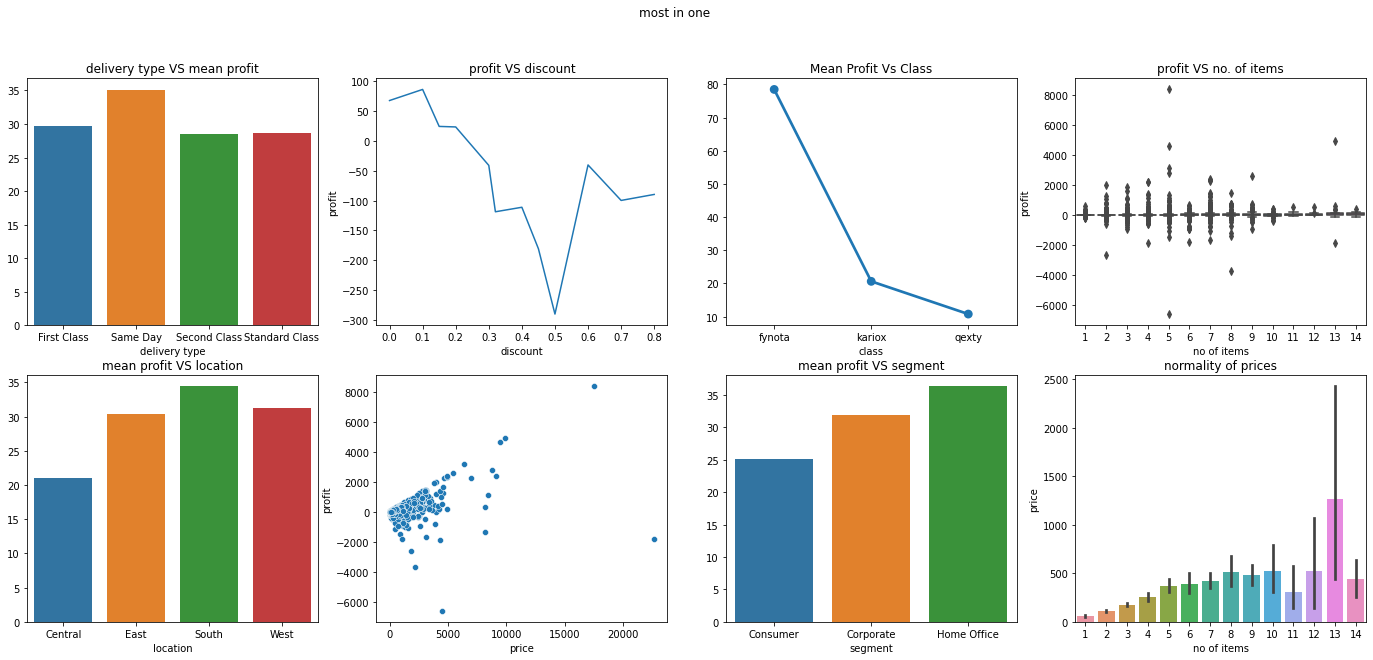

In [ ]:
dmp=dataset.groupby('delivery type')['profit'].mean()
company_profit_mean=dataset.groupby('class')['profit'].mean()


fig, axes = plt.subplots(nrows=2 ,ncols= 4,  figsize=(24, 10))
fig.suptitle('most in one')
#0
sns.barplot(ax=axes[0, 0], x=dmp.index, y=dmp.values)
axes[0, 0].set_title("delivery type VS mean profit")

#1
sns.lineplot(ax=axes[0, 1], x= dataset.groupby(dataset.discount).mean().index, 
             y = dataset.groupby(dataset.discount).mean()['profit'])
axes[0, 1].set_title("profit VS discount")

#2
sns.pointplot(ax=axes[0, 2], x=company_profit_mean.index,y=company_profit_mean.values)
axes[0, 2].set_title('Mean Profit Vs Class')

#3
sns.barplot(ax=axes[1, 0], x=dataset.groupby('location')['profit'].mean().index, y=dataset.groupby('location')['profit'].mean().values)
axes[1, 0].set_title("mean profit VS location")

#4
sns.scatterplot(ax=axes[1,1], x=dataset['price'], y=Y)

#5
sns.barplot(ax=axes[1,2], x=dataset.groupby('segment')['profit'].mean().index, y=dataset.groupby('segment')['profit'].mean().values)
axes[1,2].set_title("mean profit VS segment")

#6
sns.boxplot(ax=axes[0,3], x=dataset['no of items'], y=Y)
axes[0,3].set_title("profit VS no. of items")

#7 add price VS no. of items to check normality of price column values.
sns.barplot(ax=axes[1,3], x=dataset['no of items'], y=dataset['price'])
axes[1,3].set_title("normality of prices")

In [ ]:
#the number of unique values in categorial columns useful for encoding later
categorical_data = X.select_dtypes(include='object')
col=list(categorical_data.columns)
print("the number of unique values are:\n")
for c in col:
  print(c, categorical_data[c].nunique())
X.describe()

the number of unique values are:

departure city 469
location 4
class 3
segment 3
sub-class 17
delivery type 4
departure state 47


,discount,price,no of items
count,6700.000000,6700.000000,6700.000000
mean,0.155876,234.424275,3.798507
std,0.205922,641.440815,2.225327
min,0.000000,0.836000,1.000000
25%,0.000000,17.340000,2.000000
50%,0.200000,54.960000,3.000000
75%,0.200000,212.940000,5.000000
max,0.800000,22638.480000,14.000000


**Conclusions: before preprocess**

---


*   dropped id, RID, address code(it represents the same departure state)
*   No trends with dates, not time series analysis. Each row can be grouped
    by dates e.g all 2018 years can be replaced with 0, 2019 years with 1...
    Months can also be taken into account for better precision eg. 02-2018=2, 02-2019=14... since we don't
    have idea if the model will overfit or not due to months, it will be experimental. one will be without months and only years and another with months
    as well as years. The one with the best accuracy will be selected.
*   departure city has 47 unique values, high variance in categorical, can be neglected. Experimental inclusion-exclusion.
*   no need to scale discount lies between 0 and 1
*   according to feature co relation scatterplot price do follows a normal distribution, so we can go with standardizing the values instead of min-max scaling.
* no of items can be left as it is
* all locations nearly have same impact on profits, no superiority OHE
* class- fynota has highest mean profit can be give highest priority, so
  ordinal encoding, fynota=2, kariox=0, quexty=-1 just to give some priority    accroding to the graph.
* segment also has almost equal contibution for profit so OHE
* sub-class has 17 different values so maybe label encoding or OHE(you say)
* delivery type is OHE
* departure state has 47 diff values so maybe label encoding


---






array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3b72ceb10>,
      dtype=object)

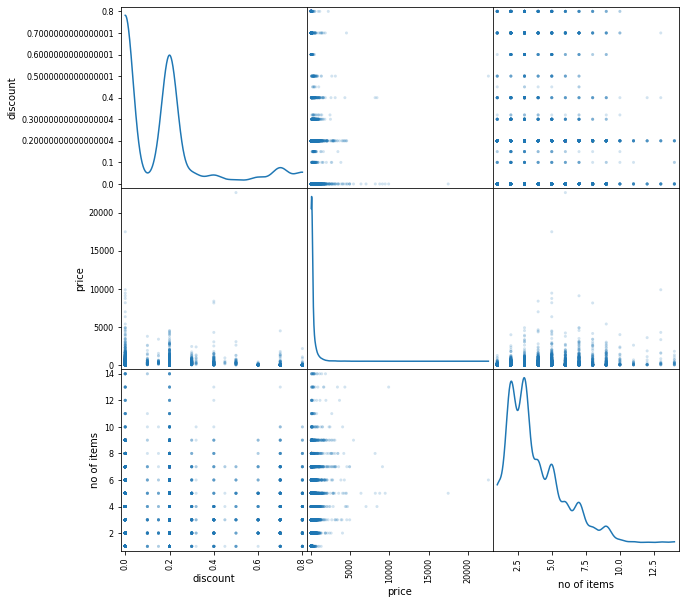

In [ ]:
#plot to study inter feature corealation
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [ ]:
# for i in range(len(X['placement date'])):
#   date=X['placement date'][i]
#   if date.year==2018:
#     X['placement date'][i]=0
#   elif date.year==2019:
#     X['placement date'][i]=1
#   elif date.year==2020:
#     X['placement date'][i]=2
#   else:
#     X['placement date'][i]=3

In [ ]:
X.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,departure state,placement date
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,2018-01-01,Texas,0
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,2018-01-01,Michigan,0
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,2018-01-01,Michigan,0
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,2018-01-01,Michigan,0
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,2018-01-01,Michigan,0


# Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ss, ms=StandardScaler(), MinMaxScaler()
le, ohe=LabelEncoder(), OneHotEncoder()

def process_to_matrix(data, y_data):
  #replacing date years with int to give chronological advantage

  for i in range(len(data['delivery date'])):
    date=data['delivery date'][i]
    if date.year==2018:
      data['delivery date'][i]=0
    elif date.year==2019:
      data['delivery date'][i]=1
    elif date.year==2020:
      data['delivery date'][i]=2
    else:
      data['delivery date'][i]=3
  
  # same for placement date
  for i in range(len(data['placement date'])):
    date=data['placement date'][i]
    if date.year==2018:
      data['placement date'][i]=0
    elif date.year==2019:
      data['placement date'][i]=1
    elif date.year==2020:
      data['placement date'][i]=2
    else:
      data['placement date'][i]=3
  
  data=data.drop(['departure city'], axis=1)
  data['sub-class']=le.fit_transform(data['sub-class']) # label encoding the items
  data['departure state']=le.fit_transform(data['departure state'])
  data['class']=data['class'].replace(["fynota", 'kariox', 'qexty'],  (2, 0, -1))

  data=data.values
  data[:, 1:2]=ss.fit_transform(data[:, 1:2]) #standard scaling the price values
  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3, 5, 7])], remainder='passthrough')
  #ohe delivery type, segment , location
  data=ct.fit_transform(data)
  y_data=y_data.values.reshape(-1,1)
  #y_data=ms.fit_transform(y_data) # min-max scaling the y values.
  return data, y_data

# #in stake departure state. increasing the dimension to lot extent





#after min max scaling y data (only one line uncommented from ur code)


# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ss, ms=StandardScaler(), MinMaxScaler()
# le, ohe=LabelEncoder(), OneHotEncoder()

# def process_to_matrix(data, y_data):
#   #replacing date years with int to give chronological advantage

#   for i in range(len(data['delivery date'])):
#     date=data['delivery date'][i]
#     if date.year==2018:
#       data['delivery date'][i]=0
#     elif date.year==2019:
#       data['delivery date'][i]=1
#     elif date.year==2020:
#       data['delivery date'][i]=2
#     else:
#       data['delivery date'][i]=3
  
#   # same for placement date
#   for i in range(len(data['placement date'])):
#     date=data['placement date'][i]
#     if date.year==2018:
#       data['placement date'][i]=0
#     elif date.year==2019:
#       data['placement date'][i]=1
#     elif date.year==2020:
#       data['placement date'][i]=2
#     else:
#       data['placement date'][i]=3
  
#   data=data.drop(['departure city'], axis=1)

#   data['sub-class']=le.fit_transform(data['sub-class']) # label encoding the items

#   data['departure state']=le.fit_transform(data['departure state'])

#   data['class']=data['class'].replace(["fynota", 'kariox', 'qexty'],  (2, 0, -1))


#   data=data.values

#   data[:, 1:2]=ss.fit_transform(data[:, 1:2]) #standard scaling the price values


#   ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3, 5, 7])], remainder='passthrough')
#   #ohe delivery type, segment , location
#   data=ct.fit_transform(data)

#   y_data=y_data.values.reshape(-1,1)
#   y_data=ms.fit_transform(y_data) # min-max scaling the y values.

#   return data, y_data

#in stake departure state. increasing the dimension to lot extent

X and Y matrices of the whole dataset


---



In [8]:
# # matrices of whole dataset to be used finally before submission 
X_matrix, Y_matrix=process_to_matrix(X, Y)
X_test_matrix,_=process_to_matrix(X_test, Y)

# my code after min max scaling...no change
# matrices of whole dataset to be used finally before submission 
# X_matrix, Y_matrix=process_to_matrix(X, Y)
# X_test_matrix,_=process_to_matrix(X_test, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

In [9]:
print(X_matrix.shape, X_test_matrix.shape)

(6700, 19) (3294, 19)




---
Matrices of the test and train sets for evaluation and testing.



In [10]:
x_train_mat, y_train_mat=process_to_matrix(x_train, y_train)
x_test_mat,_=process_to_matrix(x_test, y_test)
y_test_mat=y_test.values.reshape(-1,1)


#my code after minmax scaling only one last line commented

# x_train_mat, y_train_mat=process_to_matrix(x_train, y_train)
# x_test_mat,y_test_mat=process_to_matrix(x_test, y_test)

#y_test_mat=y_test.values.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

In [11]:
print(x_train_mat.shape, y_train_mat.shape,"\n")
print(x_test_mat.shape, y_test_mat.shape)

(5360, 19) (5360, 1) 

(1340, 19) (1340, 1)


# Models & performance: Without standardizing profit

In [ ]:
'''we may also try reducing dimensions by Singular value Decomposition'''

# we can try other models for reducing dimensions like PCA and t-SNE

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=15, n_iter=11, random_state=45)
x_train_red = svd.fit_transform(x_train_mat)
x_test_red = svd.transform(x_test_mat)
print(x_train_red.shape, x_test_red.shape)

'''But it also doesn't affects much''' 

(5360, 15) (1340, 15)


"But it also doesn't affects much"

Linear Regression 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 
#from sklearn

In [13]:
lr_model=LinearRegression()
lr_model.fit(x_train_mat, y_train_mat)
print(lr_model.score(x_train_mat, y_train_mat))
'''we are not going to use R2 score for judgement since the predit method gives scaled values and
y_train contains unscaled values, so I think 🤔 RMSE will be good :/'''

0.2848730222540268


'we are not going to use R2 score for judgement since the predit method gives scaled values and\ny_train contains unscaled values, so I think 🤔 RMSE will be good :/'

In [14]:
results=lr_model.predict(x_test_mat)
#results1=ms.inverse_transform(results)

In [15]:
print("the RMSE is:", sqrt(mean_squared_error(y_test_mat, results))) # RMSE is reduced to 0.41 from 226 when used minmax scalar in profit !!!!!

the RMSE is: 226.40964719361756


Decision tree regressor and random forest regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[9, 10, 11, 12]}

dt_model = DecisionTreeRegressor(random_state = 0) 
clf = GridSearchCV(dt_model, parameters, cv=5, refit=True)
clf.fit(X_matrix, Y_matrix)

print(clf.best_params_)


{'max_depth': 11}


In [17]:
dt_model = DecisionTreeRegressor(max_depth=11)

dt_model.fit(x_train_mat, y_train_mat)

y_train_pred = dt_model.predict(x_train_mat)
y_pred = dt_model.predict(x_test_mat)


print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


#with min max scalar on profit
# Train r2 score:  0.9929352918520938
# Test r2 score:  -236.42661256012633
# Train RMSE: 0.0016
# Test RMSE: 0.4131

Train r2 score:  0.9929700657472971
Test r2 score:  -0.08352675181711344
Train RMSE: 18.9325
Test RMSE: 256.4922


In [ ]:
# prediction = dt_model.predict(X_test_matrix)

In [ ]:
# prediction.shape

(3294,)

In [ ]:

from sklearn.ensemble import RandomForestRegressor

parameters = {'max_depth':[11, 12, 13, 14], "n_estimators":[120, 150, 170, 190]}

rf_model = RandomForestRegressor(random_state = 0, n_estimators=150, max_depth=12) 
clf = GridSearchCV(rf_model, parameters, cv=5, refit=True, verbose=1, n_jobs=-1)
clf.fit(x_train_mat, y_train)
print(clf.best_params_)
print("r2 score:", clf.score(x_train_mat, y_train_mat))

'''overfitting'''

In [ ]:
rf_model = RandomForestRegressor(random_state = 0, n_estimators=150, max_depth=12)
rf_model.fit(X_matrix, Y)
results=clf.predict(X_test_matrix)
#print("the RMSE is:", sqrt(mean_squared_error(y_test_mat, results)))

I guess the overfitting occurs because our training data is comparatively small

So lets try some regularization to simple linear model in order to avoid overfitting like using Ridge and Lasso Regressors


In [18]:
# ridge regressor
from sklearn.linear_model import Ridge

params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_matrix,Y_matrix)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')


#with min max scalar on profit
# Optimal alpha: 0.50
# Optimal fit_intercept: True
# Optimal normalize: True
# Optimal solver: saga
# Best score: -0.013304186360330822

Optimal alpha: 0.50
Optimal fit_intercept: True
Optimal normalize: True
Optimal solver: saga
Best score: -199.54204280071454


In [19]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(x_train_mat, y_train_mat)
y_train_pred = ridge_model.predict(x_train_mat)
y_pred = ridge_model.predict(x_test_mat)


print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


#with min max scalar on profit
# Train r2 score:  -4.784270556004419
# Test r2 score:  -237.16276506430415
# Train RMSE: 0.0162
# Test RMSE: 0.4137

Train r2 score:  -4.782430048261023
Test r2 score:  0.15862464357400385
Train RMSE: 195.8170
Test RMSE: 226.0212


In [ ]:
#lasso regressor

from sklearn.linear_model import Lasso
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_matrix, Y_matrix)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

#havent run with minmax scalar on profit

Optimal alpha: 0.10
Optimal fit_intercept: True
Optimal normalize: True
Best score: -201.21412306143253


In [ ]:

lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    normalize=lasso_regressor.best_params_["normalize"])
lasso_model.fit(x_train_mat, y_train_mat)
y_train_pred = lasso_model.predict(x_train_mat)
y_pred = lasso_model.predict(x_test_mat)


print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -2.044196148746507
Test r2 score:  0.16006001245096613
Train RMSE: 192.4136
Test RMSE: 225.8284


In [ ]:
# elastic net

from sklearn.linear_model import ElasticNetCV, ElasticNet

# Use ElasticNetCV to tune alpha automatically instead of redundantly using ElasticNet and GridSearchCV
el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=10, n_jobs=-1)         
el_model.fit(X_matrix, Y_matrix)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')
print(f'Number of iterations {el_model.n_iter_}')


#havent run with minmax scalar on profit

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal alpha: 5.274676
Optimal l1_ratio: 1.000
Number of iterations 7


In [ ]:
y_train_pred = el_model.predict(x_train_mat)
y_pred = el_model.predict(x_test_mat)

print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

#no improvement

Train r2 score:  -2.5474412207291013
Test r2 score:  0.15294271641781843
Train RMSE: 193.9941
Test RMSE: 226.7831


In [20]:
#knn regressor

from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_matrix, Y_matrix)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

# #with min max scalar on profit
# Optimal neighbors: 11
# Best score: -0.012966869696837474


Optimal neighbors: 11
Best score: -194.50244897655605


In [21]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(x_train_mat, y_train_mat)
y_train_pred = knn_model.predict(x_train_mat)
y_pred = knn_model.predict(x_test_mat)
print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


# #with min max scalar on profit
# #very bad r2 score
# Train r2 score:  -3.9223239702202806
# Test r2 score:  -237.79308198318466
# Train RMSE: 0.0147
# Test RMSE: 0.4142

Train r2 score:  -3.9223239702202823
Test r2 score:  0.08103756048968247
Train RMSE: 178.1500
Test RMSE: 236.2127


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# params_rf = {
#     'max_depth': [10, 30, 35, 50, 65, 75, 100],
#     'max_features': [.3, .4, .5, .6],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [30, 50, 100, 200]
# }

# rf = RandomForestRegressor()
# rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
# rf_regressor.fit(x_train_mat, y_train_mat)
# print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
# print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
# print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
# print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
# print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
# print(f'Best score: {rf_regressor.best_score_}')

In [ ]:
# rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
#                                  max_features=rf_regressor.best_params_["max_features"], 
#                                  min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
#                                  min_samples_split=rf_regressor.best_params_["min_samples_split"], 
#                                  n_estimators=rf_regressor.best_params_["n_estimators"], 
#                                  n_jobs=-1, oob_score=True)
# rf_model.fit(x_train_mat, y_train_mat)
# y_train_pred = rf_model.predict(x_train_mat)
# y_pred = rf_model.predict(x_test_mat)
# print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
# print('Test r2 score: ', r2_score(y_test_mat, y_pred))
# train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
# test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))
# print(f'Train RMSE: {train_rmse:.4f}')
# print(f'Test RMSE: {test_rmse:.4f}')

In [ ]:
#lightbgm

In [22]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_matrix, Y_matrix)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

# #with min max scalar
# Optimal lr: 0.5
# Optimal feature_fraction: 1
# Optimal n_estimators: 100
# Best score: -0.009270715467693456

Optimal lr: 0.5
Optimal feature_fraction: 1
Optimal n_estimators: 100
Best score: -139.06030620058152


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
lgb_model = lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], boosting='gbdt', 
                               metric='l1', feature_fraction=lgb_regressor.best_params_["feature_fraction"], 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(x_train_mat, y_train_mat)
y_train_pred = lgb_model.predict(x_train_mat)
y_pred = lgb_model.predict(x_test_mat)
print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

#with min max scalar
# Train r2 score:  0.9641215723192995
# Test r2 score:  -236.12860842493708
# Train RMSE: 0.0033
# Test RMSE: 0.4128


#good r2 train score

Train r2 score:  0.964121570127011
Test r2 score:  0.24975931719446842
Train RMSE: 40.3608
Test RMSE: 213.4296


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#xgboost
from xgboost.sklearn import XGBRegressor

params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(X_matrix, Y_matrix)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

#havent run with min max scalar

[15:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal lr: 0.1
Optimal colsample_bytree: 0.6
Optimal n_estimators: 30
Best score: -169.33197493157644


In [ ]:
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)

xgb_model.fit(x_train_mat, y_train_mat)
y_train_pred = xgb_model.predict(x_train_mat)
y_pred = xgb_model.predict(x_test_mat)


print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))


train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# bad r2 score

[15:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.28498238613887605
Test r2 score:  0.33706071833305173
Train RMSE: 117.3171
Test RMSE: 200.6279


In [ ]:
# XGB with early stopping
xgb_model.fit(x_train_mat, y_train_mat, early_stopping_rounds=4,
             eval_set=[(x_test_mat, y_test_mat)], verbose=False)
y_train_pred = xgb_model.predict(x_train_mat)
y_pred = xgb_model.predict(x_test_mat)

print('Train r2 score: ', r2_score(y_train_pred, y_train_mat))
print('Test r2 score: ', r2_score(y_test_mat, y_pred))

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_mat))
test_rmse = np.sqrt(mean_squared_error(y_test_mat, y_pred))

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


[15:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  -0.3565010029083382
Test r2 score:  0.35135693899026144
Train RMSE: 133.5377
Test RMSE: 198.4528


In [ ]:
# using stacking regressor

In [ ]:
# using keras regressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [ ]:
# needed for converting numpy to tensors
x_modify = np.asarray(x_train_mat).astype('float32')
y_modify = np.asarray(y_train_mat).astype('float32')


In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x_modify, y_modify, cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Results: -51422.29 (57719.70) MSE


In [ ]:
# # evaluate model with standardized dataset
# np.random.seed(seed)
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = KFold(n_splits=10, random_state=seed)
# results = cross_val_score(pipeline, x_modify, y_modify, cv=kfold, n_jobs=1)
# print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# #huge time taking

In [ ]:
#LSTM
#better with minmax scalar on profit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.losses import mean_squared_error

In [ ]:
# needed for converting numpy to tensors
x_modify = np.asarray(x_train_mat).astype('float32')
y_modify = np.asarray(y_train_mat).astype('float32')

In [ ]:
# reshaping needed for keras lstm
x_reshape = x_modify.reshape(-1, 1, 19)
y_reshape = y_modify.reshape(-1, 1, 1)

In [ ]:
x_reshape.shape

(5360, 1, 19)

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = keras.models.Sequential([
    keras.layers.LSTM(19, return_sequences=True, input_shape=(1,19)),
    keras.layers.LSTM(19, return_sequences=True),
    keras.layers.LSTM(19),
    keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss = 'mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

early_stopping = EarlyStopping(
    patience=5, # how many epochs to wait before stopping
    monitor='val_rmse', 
    mode='min',
    restore_best_weights=True,
)

reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_rmse', 
    factor=0.8, 
    patience=2, 
    mode='auto', 
    cooldown=3,
    min_lr=0.00001
)

model.summary()

history = model.fit(x_reshape, y_reshape, epochs=48,
                    #validation_data=(X_valid, y_valid),
                    callbacks = [early_stopping, reduceLROnPlat])

#results shown are with min max scalar on profit
# 48th epoch showed minm loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 19)             2964      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 19)             2964      
_________________________________________________________________
lstm_2 (LSTM)                (None, 19)                2964      
_________________________________________________________________
dense (Dense)                (None, 1)                 20        
Total params: 8,912
Trainable params: 8,912
Non-trainable params: 0
_________________________________________________________________
Epoch 1/48
168/168 [==============================] - 5s 4ms/step - loss: 0.0481 - rmse: 0.2135
Epoch 2/48
168/168 [==============================] - 1s 4ms/step - loss: 5.2933e-04 - rmse: 0.0228
Epoch 3/48
168/168 [==============================] - 1s

In [ ]:
# needed for converting numpy to tensors
x_test_modify = np.asarray(x_test_mat).astype('float32')

#y_test_modify = np.asarray(y_test_mat).astype('float32')

In [ ]:
# reshaping needed for keras lstm
x_test_reshape = x_test_modify.reshape(-1, 1, 19)

#y_test_reshape = y_test_modify.reshape(-1, 1, 1)

In [ ]:
prediction = model.predict(x_test_reshape)

In [ ]:
prediction.shape

(1340, 1)

In [ ]:
#calculating r2 score and rmse score



In [ ]:
# rf_model.fit(X_matrix, Y)
# results=clf.predict(X_test_matrix)

For submission

In [ ]:

X_test_matrix_modify = np.asarray(X_test_matrix).astype('float32')

X_test_matrix_reshape = X_test_matrix_modify.reshape(-1, 1, 19)

In [ ]:
prediction_1 = model.predict(X_test_matrix_reshape)

In [ ]:
prediction_1.shape

(3294, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler as ms

In [ ]:
results=prediction_1
results1=ms.inverse_transform(results)

In [ ]:
final = prediction_1[:,0].reshape(-1)



---
final csv file


In [ ]:
submission=pd.DataFrame({"id":csv_file_ids, "profit":final})

In [ ]:
from google.colab import files
submission.to_csv('attempt3.csv', index=False) 
files.download('attempt3.csv')
print("download complete")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

download complete
